In [1]:
import os  #os module provide functionalities to interact with my operating system.

from sklearn.feature_extraction.text import TfidfVectorizer #coverts text into numerical form
# TF-IDF example:
# sen1=good girl
# sen2=good boy
# sen3=good boy girl
# TF=no.of repitions of words in sentence/no.of words in sentences
# IDF=log(no.of sentences/no.of sentences containing words)
# TF*IDF

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
import os
import ipywidgets as widgets
from IPython.display import display

# Create text boxes for user input
dir_input = widgets.Text(description="Directory Path:")
ext_input = widgets.Text(description="File Extension:")

# Create a button for submitting the input
button = widgets.Button(description="Submit", button_style='success')

# Create an output widget for displaying the result
output = widgets.Output()

# Function to run when the button is clicked
def on_button_click(b):
    with output:
        # Retrieve user input from widgets
        dir_path = dir_input.value
        file_ext = ext_input.value

        # Construct the list of file paths
        global student_files
        student_files = [os.path.join(dir_path, doc) for doc in os.listdir(dir_path) if doc.endswith(file_ext)]

        # Print the selected directory and extension for confirmation
        print("Selected Directory:", dir_path)
        print("Selected Extension:", file_ext)

        # Display the list of files
        print("Files to compare:")
        for file_path in student_files:
            print("-", file_path)

# Attach the function to the button's click event
button.on_click(on_button_click)

# Display the widgets and output
display(dir_input, ext_input, button, output)


Text(value='', description='Directory Path:')

Text(value='', description='File Extension:')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

In [3]:
student_notes=[open(_file,encoding='utf-8').read() for _file in student_files] #each txt is opened and stored(content)
print("\n".join(student_notes))

#include <stdio.h>

int main() {
    char operator;
    double num1, num2, result;
    
    printf("Enter an operator (+, -, *, /): ");
    scanf("%c", &operator);
    
    printf("Enter two numbers: ");
    scanf("%lf %lf", &num1, &num2);
    
    switch (operator) {
        case '+':
            result = num1 + num2;
            break;
        case '-':
            result = num1 - num2;
            break;
        case '*':
            result = num1 * num2;
            break;
        case '/':
            if (num2 != 0)
                result = num1 / num2;
            else {
                printf("Error: Division by zero\n");
                return 1;
            }
            break;
        default:
            printf("Error: Invalid operator\n");
            return 1;
    }
    
    printf("Result: %lf\n", result);
    
    return 0;
}

#include <stdio.h>

int main() {
    char op;
    double x, y, res;
    
    printf("Enter an operator (+, -, *, /): ");
    scanf("%c", &op);
   

In [4]:
# refers to the character encoding of a text file.
# It is specifying that the content of the file is 
# encoded using UTF-8.UTF-8 (Unicode Transformation Format 8-bit)
#     is a widely used character encoding that can represent
# every character in the Unicode character set.

In [5]:
def vectorize(text):
    return TfidfVectorizer().fit_transform(text).toarray() 
#result will convert documents into a Tfidf matrix where every row represents a document and each element in the row represents 
#the Tfidf of a token in the following document with respect to all the documents.

def similarity(doc1,doc2):
    return cosine_similarity([doc1,doc2]) #similarity between the doc1 and doc2

vectors=vectorize(student_notes) # to store the vectors

print(vectors) 

s_vectors=list(zip(student_files,vectors)) # it will zip individual documents tfidf with the identifier of that particluar document.
# print(s_vectors)



[[0.05376785 0.21507141 0.05376785 0.21507141 0.05376785 0.05376785
  0.05376785 0.05376785 0.05376785 0.1075357  0.1075357  0.05376785
  0.05376785 0.05376785 0.05376785 0.16130356 0.05376785 0.45341304
  0.52898188 0.05376785 0.         0.26883926 0.26883926 0.
  0.37637497 0.16130356 0.1075357  0.05376785 0.05376785 0.05376785
  0.05376785]
 [0.07108666 0.28434666 0.07108666 0.28434666 0.07108666 0.07108666
  0.07108666 0.07108666 0.07108666 0.14217333 0.14217333 0.07108666
  0.07108666 0.07108666 0.07108666 0.21325999 0.07108666 0.
  0.         0.07108666 0.29972948 0.14217333 0.35543332 0.59945895
  0.07108666 0.21325999 0.14217333 0.07108666 0.07108666 0.07108666
  0.07108666]]


In [6]:
def check_plagiarism():
    global s_vectors
    plagiarism_results = set()  # Initialize the set to store plagiarism results

    for student_a, text_vector_a in s_vectors:
        # filename and array are displayed so two variables are taken
        new_vectors = s_vectors.copy()
        current_index = new_vectors.index((student_a, text_vector_a))  # one file is compared with every file
        print(current_index)
        del new_vectors[current_index]

        for student_b, text_vector_b in new_vectors:
            sim_score = similarity(text_vector_a, text_vector_b)[0][1]
            print(sim_score)
            student_pair = sorted((student_a, student_b))  # sorted
            score = (student_pair[0], student_pair[1], sim_score)  # [0]-first person and [1]-second person
            plagiarism_results.add(score)

    return plagiarism_results



In [7]:
x=check_plagiarism()

0
0.46248344563088567
1
0.46248344563088567


In [8]:
print(x)

{('./cfilesfortesing\\varnames1.c', './cfilesfortesing\\varnames2.c', 0.46248344563088567)}


In [9]:
num=0
for tup in x:
    num+=1
    print(num)
    percentage="{:.2f}%".format(tup[2]*100)
    print(f" similarity between {tup[0]} , {tup[1]} is : {percentage}")

1
 similarity between ./cfilesfortesing\varnames1.c , ./cfilesfortesing\varnames2.c is : 46.25%


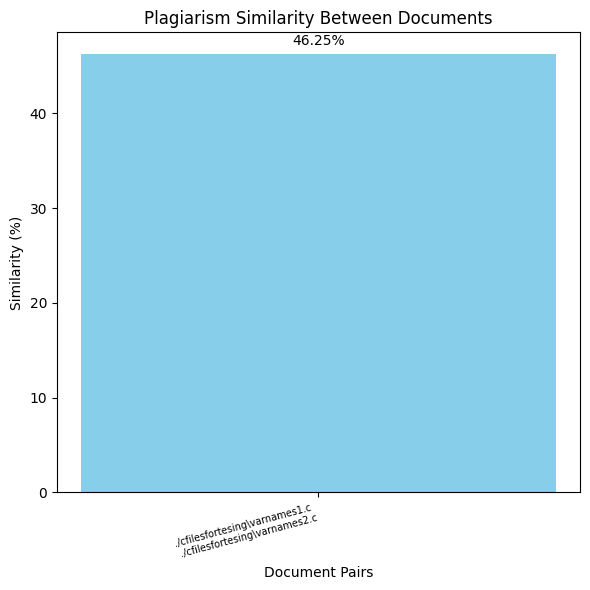

In [10]:
import matplotlib.pyplot as plt
plotting_data=list(x)
# Extracting data for plotting
categories = [f"{tup[0]} \n {tup[1]}" for tup in x]
percentages = [float("{:.2f}".format(tup[2] * 100)) for tup in x]  # Convert to float

# Assigning different colors to each bar
colors = ['skyblue', 'lightgreen','green','red','orange','yellow','violet']

# Create a bar graph
plt.figure(figsize=(6, 6))
bars = plt.bar(categories, percentages, color=colors)

# Adding labels and title
plt.xlabel('Document Pairs')
plt.ylabel('Similarity (%)')
plt.title('Plagiarism Similarity Between Documents')

# Adding percentage labels above the bars
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2, bars[i].get_height() + 1, f'{percentages[i]:.2f}%', ha='center')

plt.xticks(rotation=15, ha='right', fontsize=7)
plt.tight_layout()

# Display the graph
plt.show()